In [1]:
import subprocess, sys
subprocess.check_call([sys.executable, "-m", "pip", "install", "seaborn"])
subprocess.check_call([sys.executable, "-m", "pip", "install", "marimo"])

0

In [1]:
import pandas as pd
import ast
import matplotlib.pyplot as plt
import seaborn as sns

In [38]:
df_initial = pd.read_csv("test_results_initial_pipeline2.csv")
latency_lines = df_initial['latencies']
records = []
for rec in latency_lines:
    data = ast.literal_eval(rec)
    # print(data)
    records.append(data)

df_plot_initial = pd.DataFrame(records)
df_plot_initial

,prune,gen_t2c,get_cypher_query,exec_query,answer_gen,run_query_forward,full_run
0,2.919713,1.436808,4.356536,0.016624,0.907806,5.281015,5.428438
1,2.347206,1.420436,3.767660,0.013506,6.802027,10.583590,10.607266
2,1.713960,1.438804,3.152810,0.011146,1.085850,4.249896,4.273584
3,1.743073,1.610560,3.353646,0.002220,8.890756,12.247120,12.269382
4,4.588222,1.368587,5.956825,0.003996,1.433301,7.394174,7.418519
5,2.692670,1.328512,4.021198,0.004999,1.492901,5.519162,5.541074
6,2.474271,1.993710,4.467997,0.002515,0.733307,5.203878,5.227225
7,1.187933,1.012575,2.200523,0.001726,1.051089,3.253380,3.276053
8,3.026723,1.503383,4.530119,0.005080,0.949286,5.484546,5.508008
9,2.743807,1.138447,3.882286,0.003133,22.419038,26.306719,26.330538


In [37]:
df_new = pd.read_csv("test_results_with_caching2.csv")
latency_lines = df_new['latencies']
records = []
for rec in latency_lines:
    data = ast.literal_eval(rec)
    # print(data)
    records.append(data)

df_plot_new = pd.DataFrame(records)
df_plot_new.head()

,cache_retrieval,prune_0,few_shots_0,gen_t2c_0,get_cypher_query,postprocess_query,validate_query,exec_query,answer_gen,run_query_forward,caching,full_run,rep_t2c_0,rep_query_0,rep_postprocess_query_0,rep_validate_query_0
0,0.000018,3.075119,1.727175,1.628278,6.430920,0.001407,0.012304,0.003681,1.311961,7.760421,0.000053,8.127384,NaN,NaN,NaN,NaN
1,0.000022,2.778253,0.462683,1.488915,4.729967,0.000108,0.009366,0.001765,6.678534,11.419990,0.000034,11.468219,NaN,NaN,NaN,NaN
2,0.000009,2.207226,0.410780,1.862399,4.480532,0.000130,0.008010,0.002281,0.989459,5.480500,0.000012,5.525594,NaN,NaN,NaN,NaN
3,0.000018,1.561331,0.447606,1.736120,3.745164,0.000093,0.002172,0.001043,8.755924,12.504667,0.000012,12.548497,NaN,NaN,NaN,NaN
4,0.000013,4.511380,1.009995,1.844705,7.366128,0.000348,0.005525,0.001095,1.236837,8.609975,0.000021,8.649962,NaN,NaN,NaN,NaN


In [39]:
df_plot_new = df_plot_new[['cache_retrieval', 'prune_0', 'few_shots_0', 'gen_t2c_0', 'postprocess_query', 'validate_query', 'exec_query', 'answer_gen', 'caching', 'full_run', 'rep_t2c_0', 'rep_query_0', 'rep_postprocess_query_0', 'rep_validate_query_0']]
df_plot_new.rename(columns={
    'cache_retrieval': 'Cache Retrieval',
    'prune_0': 'Pruning',
    'few_shots_0': 'Few-Shot Prompting',
    'gen_t2c_0': 'Query Generation',
    'postprocess_query': 'Post-process Query',
    'validate_query': 'Validate Query',
    'exec_query': 'Execute Query',
    'answer_gen': 'Answer Generation',
    'caching': 'Caching Insert',
    'rep_t2c_0': 'Repair: Few-Shot Prompting',
    'rep_query_0': 'Repair: Query Generation',
    'rep_postprocess_query_0': 'Repair: Post-process Query',
    'rep_validate_query_0': 'Repair: Validate Query',
    'full_run': 'Full Run',
}, inplace=True)

df_plot_initial = df_plot_initial[['prune', 'gen_t2c', 'answer_gen']]
df_plot_initial['Few-Shot Prompting'] = [0]*len(df_plot_initial)
df_plot_initial.rename(columns={
    'prune': 'Pruning',
    'gen_t2c': 'Query Generation',
    'answer_gen': 'Answer Generation',
    'Few-Shot Prompting': 'Few-Shot Prompting'
}, inplace=True)

/var/folders/d3/bzmlqh9x74v07nxbj74dmpcm0000gn/T/ipykernel_3578/3807462560.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_plot_initial['Few-Shot Prompting'] = [0]*len(df_plot_initial)
/var/folders/d3/bzmlqh9x74v07nxbj74dmpcm0000gn/T/ipykernel_3578/3807462560.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_plot_initial.rename(columns={


# Latency analisys on cached queries - new pipline

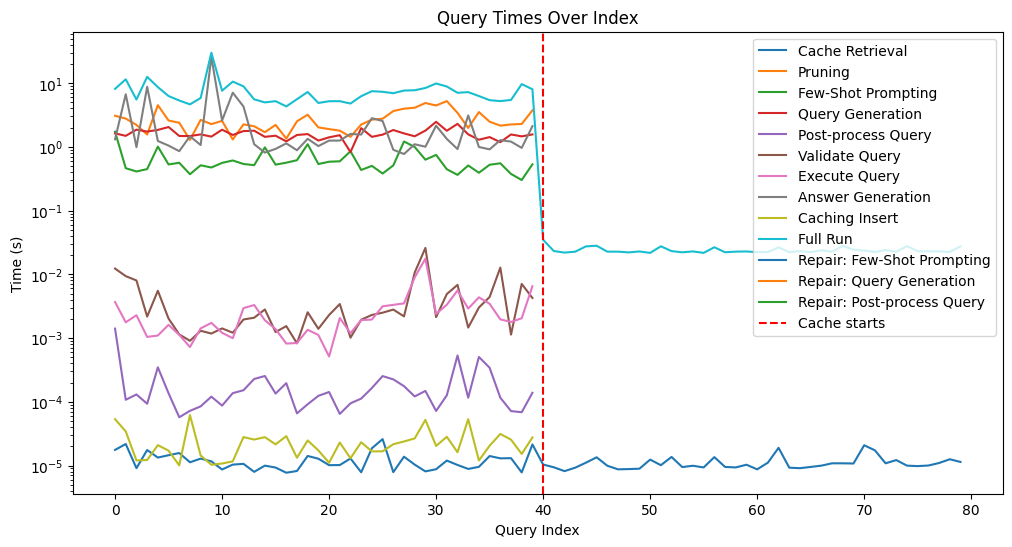

In [21]:


plt.figure(figsize=(12,6))
for col in df_plot_new.columns[:-1]:  # exclude Cached column
    plt.plot(df_plot_new.index, df_plot_new[col], label=col)
    
plt.axvline(len(df_plot_new)//2, color='red', linestyle='--', label='Cache starts')
plt.yscale('log')
plt.xlabel('Query Index')
plt.ylabel('Time (s)')
plt.title('Query Times Over Index')
plt.legend()
plt.show()

# Latency analisys - new pipeline

<Figure size 1400x600 with 0 Axes>

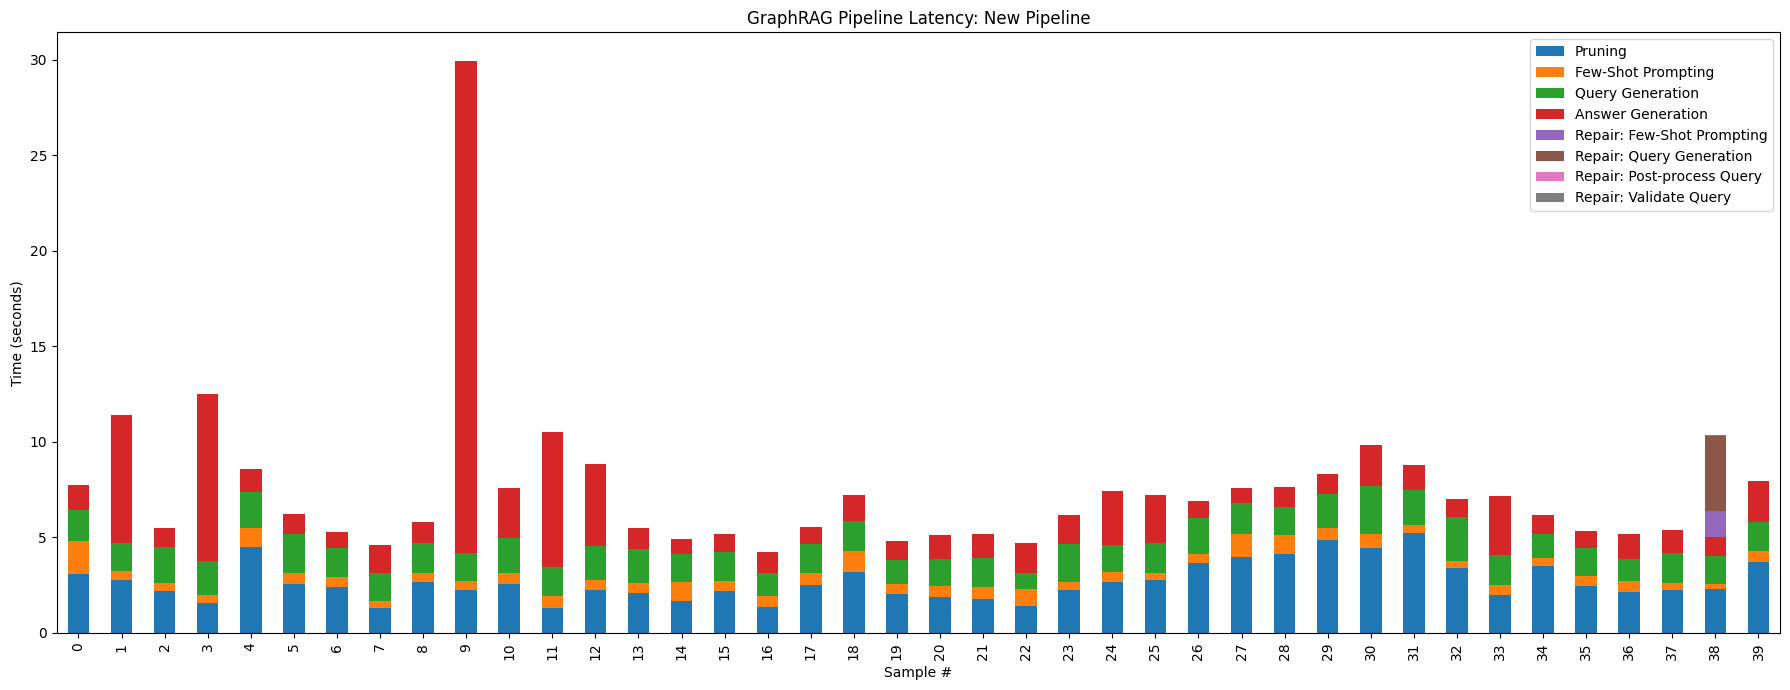

In [40]:
plt.figure(figsize=(14, 6))
df_plot_new = df_plot_new[:40]
df_plot_new = df_plot_new.drop(columns=['Full Run', 'Cache Retrieval', 'Caching Insert', 'Execute Query', 'Validate Query', 'Post-process Query'])
# Stacked bar plot
df_plot_new.plot(
    kind="bar",
    stacked=True,
    figsize=(18, 7),
    legend=True
)

plt.xlabel("Sample #")
plt.ylabel("Time (seconds)")
plt.title("GraphRAG Pipeline Latency: New Pipeline")
plt.tight_layout()
plt.show()

# Latency analysis - initial pipeline

<Figure size 1400x600 with 0 Axes>

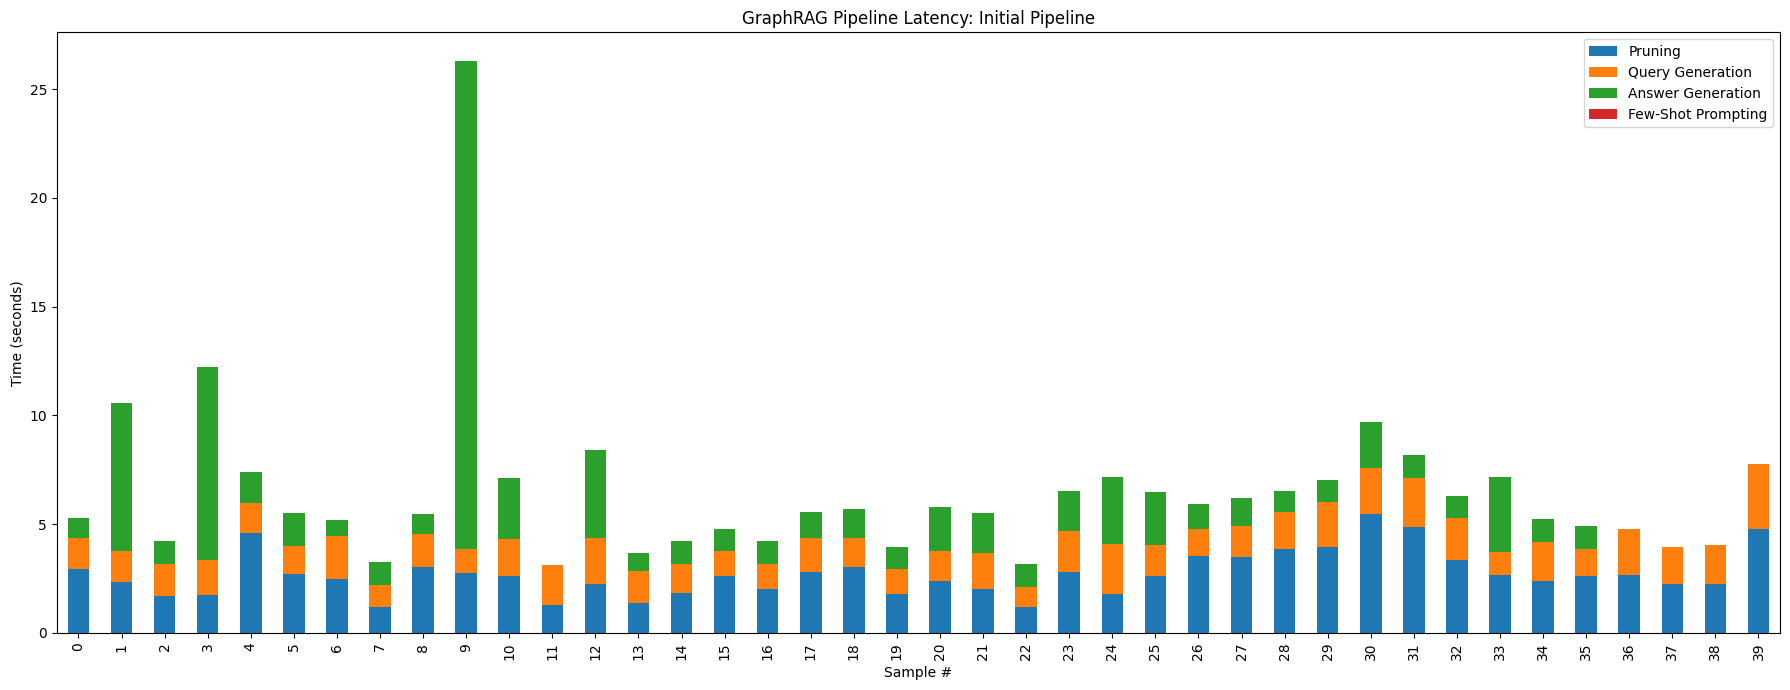

In [41]:
plt.figure(figsize=(14, 6))
# df_plot_initial = df_plot_new[:40]
# df_plot_initial = df_plot_new.drop(columns=['Full Run', 'Cache Retrieval', 'Caching Insert', 'Execute Query', 'Validate Query', 'Post-process Query'])
# Stacked bar plot
df_plot_initial.plot(
    kind="bar",
    stacked=True,
    figsize=(18, 7),
    legend=True
)

plt.xlabel("Sample #")
plt.ylabel("Time (seconds)")
plt.title("GraphRAG Pipeline Latency: Initial Pipeline")
plt.tight_layout()
plt.show()

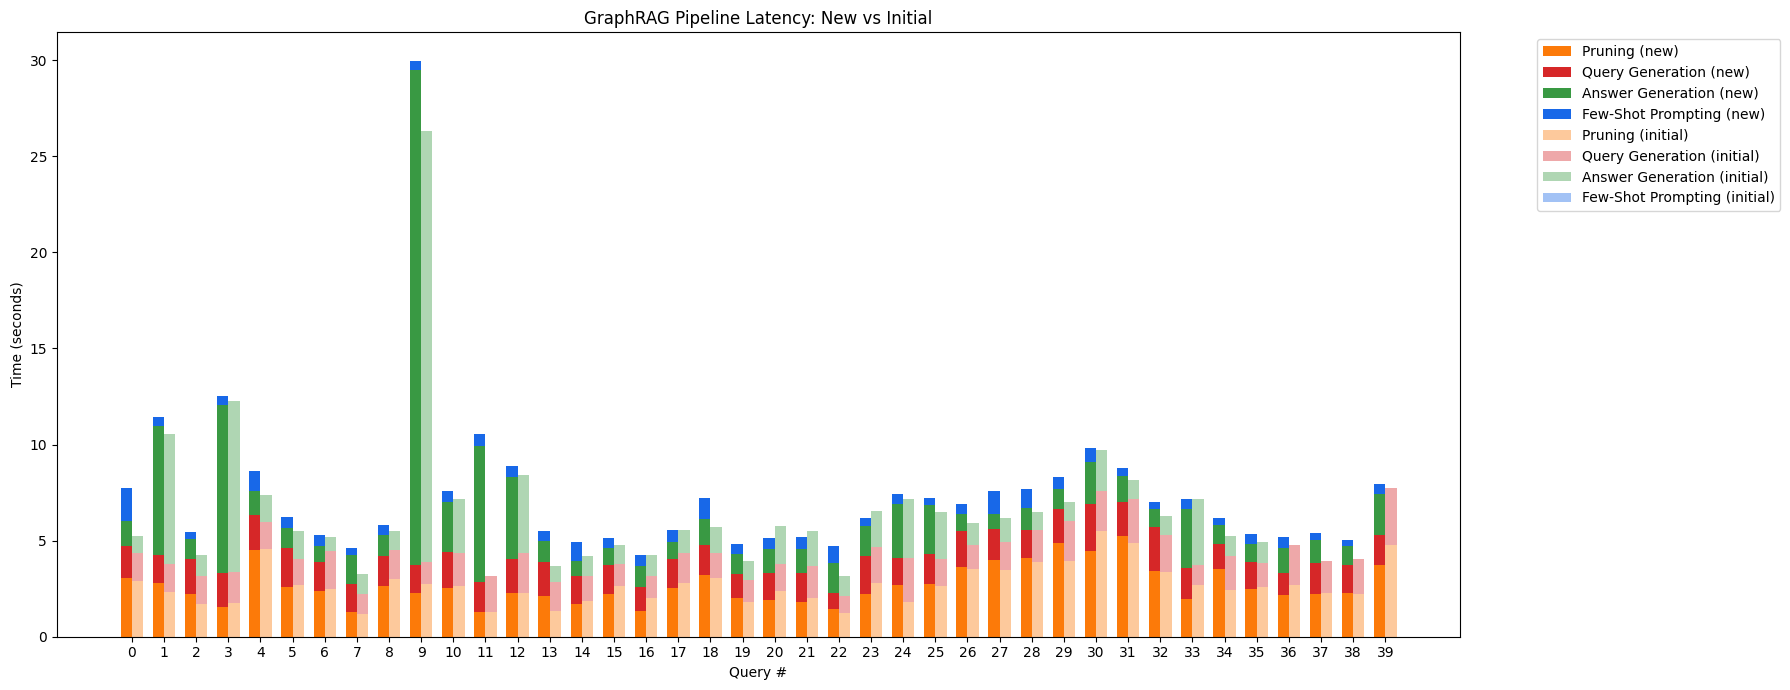

In [26]:
import matplotlib.pyplot as plt
import numpy as np
from collections import OrderedDict

# Define colors for each step
step_colors = {
    "Pruning": "#fc7a09",
    "Few-Shot Prompting": "#1868e8",
    "Query Generation": "#d62728",
    "Answer Generation": "#399943"
}

columns = df_plot_initial.columns  # ensure these are the steps you want
n_samples = len(df_plot_initial)
bar_width = 0.35
x = np.arange(n_samples)

fig, ax = plt.subplots(figsize=(18, 7))

# Plot df_plot (new pipeline)
bottom = np.zeros(n_samples)
for col in columns:
    color = step_colors.get(col, "gray")  # fallback color
    ax.bar(x - bar_width/2, df_plot_new[col], width=bar_width, bottom=bottom, label=f"{col} (new)", color=color)
    bottom += df_plot_new[col].values

# Plot df_initial_plot (initial pipeline)
bottom = np.zeros(n_samples)
for col in columns:
    color = step_colors.get(col, "gray")
    ax.bar(x + bar_width/2, df_plot_initial[col], width=bar_width, bottom=bottom, label=f"{col} (initial)", color=color, alpha=0.4)
    bottom += df_plot_initial[col].values

ax.set_xlabel("Query #")
ax.set_ylabel("Time (seconds)")
ax.set_title("GraphRAG Pipeline Latency: New vs Initial")
ax.set_xticks(x)
ax.set_xticklabels(x)

# Clean up legend to avoid duplicates
handles, labels = ax.get_legend_handles_labels()
by_label = OrderedDict(zip(labels, handles))
ax.legend(by_label.values(), by_label.keys(), bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()


# Qualitative analysis

In [27]:
df_true = pd.read_csv("./generate_examples/nobel_questions_queries.csv")
df_rag = pd.read_csv("test_results_with_caching2.csv")
df_rag = df_rag[:40]
df_init = pd.read_csv("test_results_initial_pipeline2.csv")

df_queries = df_true[['question', 'cypher']]
df_queries['rag_query'] = df_rag['generated_query'][:40]
df_queries['initial_query'] = df_init['generated_query']
df_queries.head()

,question,cypher,rag_query,initial_query
0,Who won the Nobel Prize in Physics in 2020?,MATCH (s:Scholar)-[:WON]->(p:Prize {awardYear:...,MATCH (s:Scholar)-[:WON]->(p:Prize {awardYear:...,MATCH (s1:Scholar)-[r1:WON]->(p1:Prize) WHERE ...
1,List all Nobel laureates in Chemistry.,MATCH (s:Scholar)-[:WON]->(p:Prize {category: ...,MATCH (s:Scholar)-[:WON]->(p:Prize) WHERE toLo...,MATCH (s:Scholar)-[w:WON]->(p:Prize) WHERE toL...
2,Which laureates won more than one Nobel Prize?,"MATCH (s:Scholar)-[:WON]->(p:Prize) WITH s, CO...","MATCH (s:Scholar)-[:WON]->(p:Prize) WITH s, CO...",MATCH (s1:Scholar)-[r1:WON]->(p1:Prize) WITH s...
3,Find Nobel laureates born before 1900.,MATCH (s:Scholar)-[:WON]->(p:Prize) WHERE s.bi...,MATCH (s:Scholar)-[:WON]->(p:Prize) WHERE s.bi...,MATCH (s:Scholar)-[w:WON]->(p:Prize) WHERE s.b...
4,What did Marie Curie win?,MATCH (s:Scholar)-[:WON]->(p:Prize) WHERE s.kn...,MATCH (s:Scholar)-[:WON]->(p:Prize) WHERE lowe...,MATCH (s:Scholar)-[w:WON]->(p:Prize) WHERE toL...


In [28]:
df_queries['rag_matches'] = [0]*len(df_queries)
df_queries['initial_matches'] = [0]*len(df_queries)
df_queries.head()

,question,cypher,rag_query,initial_query,rag_matches,initial_matches
0,Who won the Nobel Prize in Physics in 2020?,MATCH (s:Scholar)-[:WON]->(p:Prize {awardYear:...,MATCH (s:Scholar)-[:WON]->(p:Prize {awardYear:...,MATCH (s1:Scholar)-[r1:WON]->(p1:Prize) WHERE ...,0,0
1,List all Nobel laureates in Chemistry.,MATCH (s:Scholar)-[:WON]->(p:Prize {category: ...,MATCH (s:Scholar)-[:WON]->(p:Prize) WHERE toLo...,MATCH (s:Scholar)-[w:WON]->(p:Prize) WHERE toL...,0,0
2,Which laureates won more than one Nobel Prize?,"MATCH (s:Scholar)-[:WON]->(p:Prize) WITH s, CO...","MATCH (s:Scholar)-[:WON]->(p:Prize) WITH s, CO...",MATCH (s1:Scholar)-[r1:WON]->(p1:Prize) WITH s...,0,0
3,Find Nobel laureates born before 1900.,MATCH (s:Scholar)-[:WON]->(p:Prize) WHERE s.bi...,MATCH (s:Scholar)-[:WON]->(p:Prize) WHERE s.bi...,MATCH (s:Scholar)-[w:WON]->(p:Prize) WHERE s.b...,0,0
4,What did Marie Curie win?,MATCH (s:Scholar)-[:WON]->(p:Prize) WHERE s.kn...,MATCH (s:Scholar)-[:WON]->(p:Prize) WHERE lowe...,MATCH (s:Scholar)-[w:WON]->(p:Prize) WHERE toL...,0,0


In [29]:
df_queries.to_csv("comparison_queries_NEW.csv")

# visualizing accuracy

In [33]:
comp_res = pd.read_csv("./comparison_results.csv")
comp_res.head()

,id,question,gold_query,rag_query,initial_query,gold_result,rag_result,initial_result,rag_matches_gold,initial_matches_gold,gold_error,rag_error,initial_error
0,0,Who won the Nobel Prize in Physics in 2020?,MATCH (s:Scholar)-[:WON]->(p:Prize {awardYear:...,MATCH (s:Scholar)-[:WON]->(p:Prize {awardYear:...,MATCH (s1:Scholar)-[r1:WON]->(p1:Prize) WHERE ...,"[('Roger Penrose',), ('Reinhard Genzel',), ('A...","[('Roger Penrose',), ('Reinhard Genzel',), ('A...",[],True,False,NaN,NaN,NaN
1,1,List all Nobel laureates in Chemistry.,MATCH (s:Scholar)-[:WON]->(p:Prize {category: ...,MATCH (s:Scholar)-[:WON]->(p:Prize) WHERE toLo...,MATCH (s:Scholar)-[w:WON]->(p:Prize) WHERE toL...,"[('Otto Wallach',), ('Fritz Pregl',), ('Kurt W...","[('Aaron Klug',), ('Ahmed Zewail',), ('Alfred ...","[('Aaron Klug',), ('Ahmed H. Zewail',), ('Alfr...",False,False,NaN,NaN,NaN
2,2,Which laureates won more than one Nobel Prize?,"MATCH (s:Scholar)-[:WON]->(p:Prize) WITH s, CO...","MATCH (s:Scholar)-[:WON]->(p:Prize) WITH s, CO...",MATCH (s1:Scholar)-[r1:WON]->(p1:Prize) WITH s...,"[('John Bardeen',), ('Marie Curie',), ('Freder...","[('Frederick Sanger',), ('John Bardeen',), ('M...","[(66,), (6,), (217,), (222,), (743,)]",True,False,NaN,NaN,NaN
3,3,Find Nobel laureates born before 1900.,MATCH (s:Scholar)-[:WON]->(p:Prize) WHERE s.bi...,MATCH (s:Scholar)-[:WON]->(p:Prize) WHERE s.bi...,MATCH (s:Scholar)-[w:WON]->(p:Prize) WHERE s.b...,"[('Alfred Werner', '1866-12-12'), ('Arthur Har...","[('Alfred Werner', '1866-12-12'), ('Arthur Har...","[('1866-12-12',), ('1865-10-12',), ('1869-02-1...",True,False,NaN,NaN,NaN
4,4,What did Marie Curie win?,MATCH (s:Scholar)-[:WON]->(p:Prize) WHERE s.kn...,MATCH (s:Scholar)-[:WON]->(p:Prize) WHERE lowe...,MATCH (s:Scholar)-[w:WON]->(p:Prize) WHERE toL...,"[('physics', 1903), ('chemistry', 1911)]","[('physics', 1903), ('chemistry', 1911)]",[('in recognition of the extraordinary service...,True,False,NaN,NaN,NaN


In [34]:
true_res = comp_res['gold_result']
rag_res = comp_res['rag_result']
init_res = comp_res['initial_result']

for i in range(len(comp_res)):
    print(f"Example {i}:")
    print(f"Gold Result: {true_res[i]}")
    print(f"RAG Result: {rag_res[i]}")
    print(f"Initial Pipeline Result: {init_res[i]}")
    print(f"Rag matches: {comp_res['rag_matches_gold'][i]}, Initial matches: {comp_res['initial_matches_gold'][i]}")
    print("\n")

Example 0:
Gold Result: [('Roger Penrose',), ('Reinhard Genzel',), ('Andrea Ghez',)]
RAG Result: [('Roger Penrose',), ('Reinhard Genzel',), ('Andrea Ghez',)]
Initial Pipeline Result: []
Rag matches: True, Initial matches: False


Example 1:
Gold Result: [('Otto Wallach',), ('Fritz Pregl',), ('Kurt Wüthrich',), ('Martin Karplus',), ('Nikolay Semenov',), ('Benjamin List',), ('Alan Heeger',), ('Francis W. Aston',), ('Geoffrey Wilkinson',), ('Wendell M. Stanley',), ('Richard Willstätter',), ('Arieh Warshel',), ('Ilya Prigogine',), ('Otto Hahn',), ('Sir William Ramsay',), ('The Svedberg',), ('Walther Nernst',), ('William Lipscomb',), ('Ernest Rutherford',), ('Irène Joliot-Curie',), ('M. Stanley Whittingham',), ('Osamu Shimomura',), ('Roald Hoffmann',), ('Robert S. Mulliken',), ('Sir Harold Kroto',), ('Christian Anfinsen',), ('Edwin M. McMillan',), ('Harold C. Urey',), ('Hartmut Michel',), ('Richard Zsigmondy',), ('Robert F. Curl Jr.',), ('Glenn T. Seaborg',), ('Lars Onsager',), ('Derek Bart

In [35]:
# Calculate matches
number_of_rag_matches = comp_res['rag_matches_gold'].sum()
number_of_initial_matches = comp_res['initial_matches_gold'].sum()
print(f"Number of RAG matches: {number_of_rag_matches} out of {len(comp_res)}\n Accuracy: {number_of_rag_matches/len(comp_res)}")
print(f"Number of Initial Pipeline matches: {number_of_initial_matches} out of {len(comp_res)}\n Accuracy: {number_of_initial_matches/len(comp_res)}")

Number of RAG matches: 33 out of 40
 Accuracy: 0.825
Number of Initial Pipeline matches: 12 out of 40
 Accuracy: 0.3
